## Notebook con evaluaciones

In [1]:
import time
import numpy as np
import polars as pl
import matplotlib.pyplot as plt


from src.preprocess import cargarDataset
from src.headLayer import (
    fully_connected_lineal_cholesky,
    fully_connected_lineal_svd,
    fully_connected_lineal_qr
)

In [2]:
Xt, Yt, Xv, Yv = cargarDataset('dataset/cats_and_dogs')

print("Xt_shape: ", Xt.shape)
print("Yt_shape: ", Yt.shape)
print("Xv_shape: ", Xv.shape)
print("Yv_shape: ", Yv.shape)


Xt_shape:  (1536, 2000)
Yt_shape:  (2, 2000)
Xv_shape:  (1536, 1000)
Yv_shape:  (2, 1000)


### Computo de $W_a$

Computamos las matrices $W_a$ para cada algoritmo $a$ propuesto, midiendo los tiempos de cálculo

In [3]:
def compute_w_with_times(
    X_train: np.ndarray, 
    Y_train: np.ndarray, 
    w_algorithm: any, 
    **kwargs
) -> int:
    """
    Computo de la matriz W dado los X_train, Y_train y el algoritmo + args 
    extra si corresponde.

    Parameters:
    -----------
    - X_train: np.ndarray
        Matríz de embeddings de entrenamiento
    - Y_train: np.ndarray
        Matríz con las clasificaciones esperadas de entrenamiento
    - w_algorithm: any
        Función para el computo de W en base a X_train, Y_train, **kargs

    Returns
    -------
    - int: 
        El tiempo en segundos que tomó computar W con w_algorithm
    """
    start_time = time.perf_counter()
    W = w_algorithm(X=X_train, Y=Y_train, **kwargs)
    stop_time = time.perf_counter()
    running_time = stop_time - start_time
    return W, running_time 

In [4]:
# Test computo de W con tiempos
W_train_test, time_test = compute_w_with_times(Xt, Yt, lambda X, Y: np.random.random((2,X.shape[1])))
time_test

8.30080098239705e-05

Ahora si calculamos las posibles $W_a$...

In [5]:
# W_svd, svd_time = fully_connected_lineal_svd(Xt, Yt)
# W_cholesky, time_cholesky = fully_connected_lineal_cholesky(Xt, Yt)
# W_qr_gs, time_qr_gs = fully_connected_linear_qr(Xt, Yt, algorithm='gs')
# W_qr_hs, time_qr_hs = fully_connected_lineal_qr(Xt, Yt, algorithm='hh')

In [6]:
from src.headLayer import lineal_svd_labo

cant_features = 100
sample_size = 12
time_np = np.zeros(sample_size)
time_labo = np.zeros(sample_size)

for i in range(sample_size):
    cols = (2**i)
    _, time_np[i] = compute_w_with_times(Xt[:cant_features, :cols], Yt[:cant_features, :cols], fully_connected_lineal_svd)
    _, time_labo[i] = compute_w_with_times(Xt[:cant_features, :cols], Yt[:cant_features, :cols], lineal_svd_labo)

ImportError: cannot import name 'lineal_svd_labo' from 'src.headLayer' (/home/andre/Documents/uni/20252C/TP_ALC/src/headLayer.py)

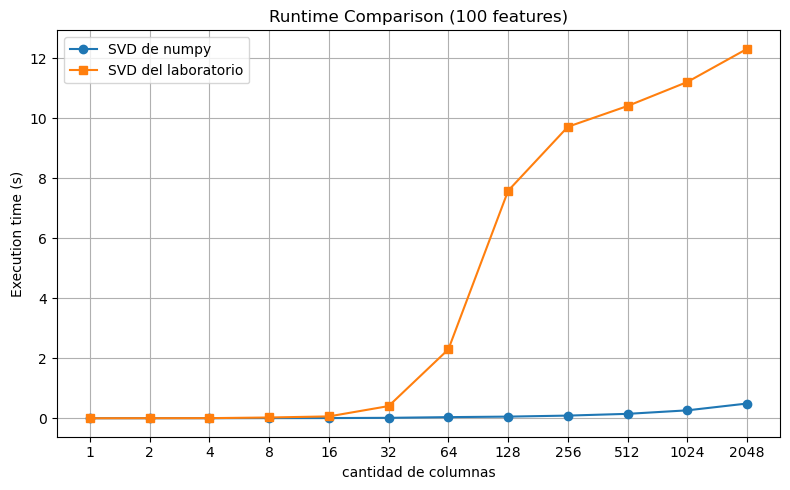

In [ ]:
import matplotlib.pyplot as plt

x = np.arange(sample_size)  # i = 0..sample_size-1

plt.figure(figsize=(8,5))
plt.plot(x, time_np, marker='o', label="SVD de numpy")
plt.plot(x, time_labo, marker='s', label="SVD del laboratorio")

tick_labels = [2**i for i in range(sample_size)]
plt.xticks(x, tick_labels)

plt.xlabel("cantidad de columnas")
plt.ylabel("Execution time (s)")
plt.title("Runtime Comparison (100 features)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
from src.headLayer import lineal_svd_labo
cols = 100
sample_size2 = 12
time_np2 = np.zeros(sample_size2)
time_labo2 = np.zeros(sample_size2)

for i in range(sample_size2):
    cant_features2 = (2**i)
    _, time_np2[i] = compute_w_with_times(Xt[:cant_features2, :cols], Yt[:cant_features2, :cols], fully_connected_lineal_svd)
    _, time_labo2[i] = compute_w_with_times(Xt[:cant_features2, :cols], Yt[:cant_features2, :cols], lineal_svd_labo)


* Finished SVD method
* Finished SVD method
* Finished SVD method
* Finished SVD method
* Finished SVD method
* Finished SVD method
* Finished SVD method
* Finished SVD method
* Finished SVD method
* Finished SVD method
* Finished SVD method
* Finished SVD method
* Finished SVD method
* Finished SVD method
* Finished SVD method
* Finished SVD method
* Finished SVD method
* Finished SVD method
* Finished SVD method
* Finished SVD method
* Finished SVD method
* Finished SVD method
* Finished SVD method
* Finished SVD method


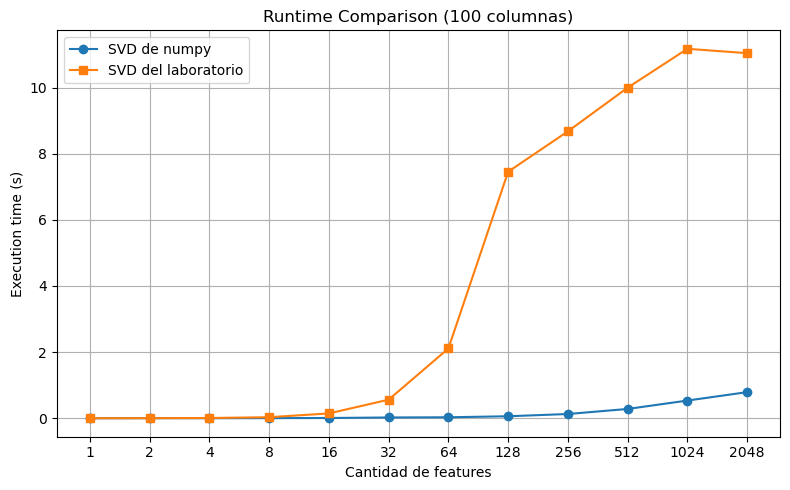

In [ ]:
x = np.arange(sample_size2)  # i = 0..sample_size-1

plt.figure(figsize=(8,5))
plt.plot(x, time_np2, marker='o', label="SVD de numpy")
plt.plot(x, time_labo2, marker='s', label="SVD del laboratorio")

tick_labels = [2**i for i in range(sample_size2)]
plt.xticks(x, tick_labels)

plt.xlabel("Cantidad de features")
plt.ylabel("Execution time (s)")
plt.title("Runtime Comparison (100 columnas)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
from src.headLayer import lineal_svd_labo

sample_size3 = 10
time_np3 = np.zeros(sample_size3)
time_labo3 = np.zeros(sample_size3)

for i in range(sample_size3):
    cant_feat_y_cols = (2**i)
    _, time_np3[i] = compute_w_with_times(Xt[:cant_feat_y_cols, :cant_feat_y_cols], Yt[:cant_feat_y_cols, :cant_feat_y_cols], fully_connected_lineal_svd)
    _, time_labo3[i] = compute_w_with_times(Xt[:cant_feat_y_cols, :cant_feat_y_cols], Yt[:cant_feat_y_cols, :cant_feat_y_cols], lineal_svd_labo)


* Finished SVD method
* Finished SVD method
* Finished SVD method
* Finished SVD method
* Finished SVD method
* Finished SVD method
* Finished SVD method
* Finished SVD method
* Finished SVD method
* Finished SVD method
* Finished SVD method
* Finished SVD method
* Finished SVD method
* Finished SVD method
* Finished SVD method
* Finished SVD method
* Finished SVD method
* Finished SVD method
* Finished SVD method
* Finished SVD method


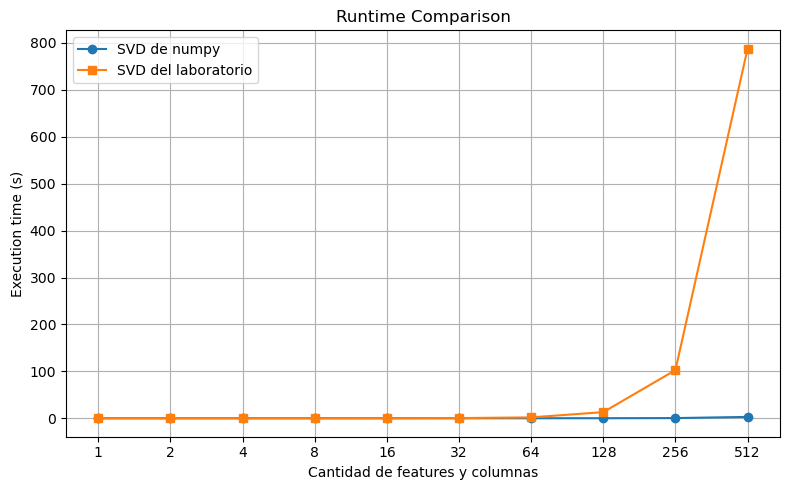

In [ ]:
x = np.arange(sample_size3)  # i = 0..sample_size-1

plt.figure(figsize=(8,5))
plt.plot(x, time_np3, marker='o', label="SVD de numpy")
plt.plot(x, time_labo3, marker='s', label="SVD del laboratorio")

tick_labels = [2**i for i in range(sample_size3)]
plt.xticks(x, tick_labels)

plt.xlabel("Cantidad de features y columnas")
plt.ylabel("Execution time (s)")
plt.title("Runtime Comparison")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [7]:
W_svd = fully_connected_lineal_svd(Xt, Yt)
print("W: ", W_svd)
print("W shape: ", W_svd.shape)

* Finished SVD method
W:  [[ 0.24987115  0.014413   -0.36632876 ... -0.32049815 -0.09584177
   0.11220589]
 [-0.25288906 -0.08416337  0.39925405 ...  0.31897726  0.00682659
  -0.17371687]]
W shape:  (2, 1536)


In [ ]:
W_ch = fully_connected_lineal_cholesky(Xt, Yt)
print("W: ", W_ch)
print("W shape: ", W_ch.shape)

* Cholesky factor L calculated
W:  [[ 0.24987115  0.01441298 -0.36632879 ... -0.32049816 -0.09584175
   0.11220588]
 [-0.25288906 -0.08416337  0.39925406 ...  0.31897728  0.00682659
  -0.17371686]]
W shape:  (2, 1536)


In [ ]:
W_qr_gs = fully_connected_lineal_qr(Xt, Yt, algorithm='gs')
print("W: ", W_qr_gs)
print("W shape: ", W_qr_gs.shape)

* Finished QR method with gs
W:  [[ 0.2498574   0.01441335 -0.36632873 ... -0.32049752 -0.09584203
   0.11220616]
 [-0.25290272 -0.084163    0.39925412 ...  0.31897793  0.0068263
  -0.17371657]]
W shape:  (2, 1536)


In [ ]:
W_qr_hh = fully_connected_lineal_qr(Xt, Yt, algorithm='hh')
print("W: ", W_qr_hh)
print("W shape: ", W_qr_hh.shape)

* Finished QR method with hh
W:  [[ 0.24987112  0.01441299 -0.36632878 ... -0.32049816 -0.09584173
   0.11220588]
 [-0.25288899 -0.08416338  0.39925406 ...  0.31897727  0.00682657
  -0.17371686]]
W shape:  (2, 1536)


## Matríz de Confusión

In [8]:
def _build_confussion_matrix(W: np.ndarray, Xv: np.ndarray, Yv: np.ndarray):
    """
    Crear matríz de confusión en base a las predicciones generadas por la 
    matríz W calculada.

    Parámetros
    ----------
    - W: np.ndarray
        Matríz con los pesos ponderados para estimar Y
    - Xv: np.ndarray    
        Matríz (r x n) con los embeddings de tamaño r para n ejemplos
        a clasificar
    - Yv: np.ndarray
        Matríz (2 x n) con las clasificaciones esperadas para los n ejemplos.
    """

    preds = W @ Xv

    pred_labels = np.argmax(preds, axis=0)
    true_labels = np.argmax(Yv, axis=0)

    confusion_matrix = np.zeros((2, 2), dtype=int)
    for t, p in zip(true_labels, pred_labels):
        confusion_matrix[t, p] += 1
 
    table = pl.DataFrame({
        "True Label": ["Cat", "Dog"],
        "Predicted Cat": confusion_matrix[:, 0].tolist(),
        "Predicted Dog": confusion_matrix[:, 1].tolist()
    })

    print(table)

    return confusion_matrix

In [ ]:
# Random test
print("Test")
W_validation_test = np.random.random(size=(2,1536))
confusion_matrix_sample = _build_confussion_matrix(_build_confussion_matrix(W_qr_gs, Xv, Yv)W_validation_test, Xv, Yv)


Test
shape: (2, 3)
┌────────────┬───────────────┬───────────────┐
│ True Label ┆ Predicted Cat ┆ Predicted Dog │
│ ---        ┆ ---           ┆ ---           │
│ str        ┆ i64           ┆ i64           │
╞════════════╪═══════════════╪═══════════════╡
│ Cat        ┆ 127           ┆ 373           │
│ Dog        ┆ 141           ┆ 359           │
└────────────┴───────────────┴───────────────┘


In [ ]:
## QR
# confusion_matrix_sample = _build_confussion_matrix(W_qr_gs, Xv, Yv)

W_qr_gs.shape, W_validation_test.shape
# (W_qr_gs @ Xv).shape

((2, 1536), (2, 1536))

In [9]:
_build_confussion_matrix(W_svd, Xv, Yv)

shape: (2, 3)
┌────────────┬───────────────┬───────────────┐
│ True Label ┆ Predicted Cat ┆ Predicted Dog │
│ ---        ┆ ---           ┆ ---           │
│ str        ┆ i64           ┆ i64           │
╞════════════╪═══════════════╪═══════════════╡
│ Cat        ┆ 334           ┆ 166           │
│ Dog        ┆ 150           ┆ 350           │
└────────────┴───────────────┴───────────────┘


array([[334, 166],
       [150, 350]])

In [ ]:
_build_confussion_matrix(W_qr_gs, Xv, Yv)

shape: (2, 3)
┌────────────┬───────────────┬───────────────┐
│ True Label ┆ Predicted Cat ┆ Predicted Dog │
│ ---        ┆ ---           ┆ ---           │
│ str        ┆ i64           ┆ i64           │
╞════════════╪═══════════════╪═══════════════╡
│ Cat        ┆ 334           ┆ 166           │
│ Dog        ┆ 150           ┆ 350           │
└────────────┴───────────────┴───────────────┘


array([[334, 166],
       [150, 350]])

In [ ]:
_build_confussion_matrix(W_qr_hh, Xv, Yv)

shape: (2, 3)
┌────────────┬───────────────┬───────────────┐
│ True Label ┆ Predicted Cat ┆ Predicted Dog │
│ ---        ┆ ---           ┆ ---           │
│ str        ┆ i64           ┆ i64           │
╞════════════╪═══════════════╪═══════════════╡
│ Cat        ┆ 334           ┆ 166           │
│ Dog        ┆ 150           ┆ 350           │
└────────────┴───────────────┴───────────────┘


array([[334, 166],
       [150, 350]])

In [ ]:
_build_confussion_matrix(W_ch, Xv, Yv)

shape: (2, 3)
┌────────────┬───────────────┬───────────────┐
│ True Label ┆ Predicted Cat ┆ Predicted Dog │
│ ---        ┆ ---           ┆ ---           │
│ str        ┆ i64           ┆ i64           │
╞════════════╪═══════════════╪═══════════════╡
│ Cat        ┆ 334           ┆ 166           │
│ Dog        ┆ 150           ┆ 350           │
└────────────┴───────────────┴───────────────┘


array([[334, 166],
       [150, 350]])

## Métricas

Para comparar los algoritmos podemos ver métricas como **F1, Precision, Recall**.

In [ ]:
def _compute_metrics_per_class(confusion_matrix: np.ndarray):
    """
    Cálculo de F1, Precision, Recall dada la matríz de confusión

    Donde:
        Precisión = TP / TP + FP
        Recall = TP / TP + FN
        F1 = 2 * Precision * Recall / (Precision + Recall)

    Parameters:
    ----------
    - confusion_matrix: np.ndarray
        Matríz de confusión
    """
    tp = np.diag(confusion_matrix).astype(float)
    pred_sum = confusion_matrix.sum(axis=0).astype(float) 
    true_sum = confusion_matrix.sum(axis=1).astype(float) 

    precision = np.divide(tp, pred_sum, out=np.zeros_like(tp), where=pred_sum != 0)
    recall = np.divide(tp, true_sum, out=np.zeros_like(tp), where=true_sum != 0)
    f1 = np.divide(2 * precision * recall, precision + recall, out=np.zeros_like(tp), where=(precision + recall) != 0)

    metrics = pl.DataFrame({
        "Metric": ["Precision", "Recall", "F1"],
        "Cat": [float(precision[0]), float(recall[0]), float(f1[0])],
        "Dog": [float(precision[1]), float(recall[1]), float(f1[1])]
    })

    print(metrics)

In [ ]:
## Test
_compute_metrics_per_class(confusion_matrix_sample)

shape: (3, 3)
┌───────────┬──────────┬──────────┐
│ Metric    ┆ Cat      ┆ Dog      │
│ ---       ┆ ---      ┆ ---      │
│ str       ┆ f64      ┆ f64      │
╞═══════════╪══════════╪══════════╡
│ Precision ┆ 0.488506 ┆ 0.493865 │
│ Recall    ┆ 0.34     ┆ 0.644    │
│ F1        ┆ 0.400943 ┆ 0.559028 │
└───────────┴──────────┴──────────┘


# Pseudoinversa

In [ ]:
from src.pseudoInversa import esPseudoInversa
from src.pseudoInversa import esPseudoInversaNaive
import numpy as np
import src.alc as alc



In [ ]:
def calcular_pinv(A):
    # U, S, V = alc.svd_reducida(A)
    U, S, Vt = np.linalg.svd(A, full_matrices=False)
    V = alc.traspuesta(Vt)
    
    Spinv = np.zeros((len(S), len(S)))

    for i in range(len(S)):
        if S[i] != 0:
            Spinv[i, i] = 1.0/S[i]
    return alc.dot(V, alc.dot(Spinv, alc.traspuesta(U)))

In [ ]:
A = np.array([
    [1.,2.,3.],
    [4.,2.,6.],
    [7.,8.,9.]
])

B = calcular_pinv(A)

La funcion esPseudoInversaNaive() chequea las cuatro condiciones de la definicion de pseudoinversa creada por moore-penrose

In [ ]:
print("inversa: \n", B)
print("assert == A: \n", A @ B @ A)
print("assert simetrica: \n", A @ B)
print("assert = pinv: \n", B @ A @ B)
print("assert simetrica: \n", B @ A)

inversa: 
 [[-0.83333333  0.16666667  0.16666667]
 [ 0.16666667 -0.33333333  0.16666667]
 [ 0.5         0.16666667 -0.16666667]]
assert == A: 
 [[1. 2. 3.]
 [4. 2. 6.]
 [7. 8. 9.]]
assert simetrica: 
 [[ 1.00000000e+00 -5.55111512e-17  4.44089210e-16]
 [-8.88178420e-16  1.00000000e+00  3.33066907e-16]
 [-1.77635684e-15 -2.22044605e-16  1.00000000e+00]]
assert = pinv: 
 [[-0.83333333  0.16666667  0.16666667]
 [ 0.16666667 -0.33333333  0.16666667]
 [ 0.5         0.16666667 -0.16666667]]
assert simetrica: 
 [[ 1.00000000e+00  0.00000000e+00  4.44089210e-16]
 [ 2.22044605e-16  1.00000000e+00 -2.22044605e-16]
 [ 6.66133815e-16  0.00000000e+00  1.00000000e+00]]


In [ ]:
print(esPseudoInversaNaive(A, B))

True


Notamos que gran parte de las cuentas en las condiciones estaban repetidas, por eso decidimos hacer una version que se aproveche de eso asi evita computo innecesario

In [ ]:
print(esPseudoInversa(A, B))

False
